In [13]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

file_list = glob.glob("D:/DF/doing_data_science-master/nyt*.csv")
all_data = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)

gender_mapping = {0: 'Female', 1: 'Male'}
all_data['Gender'] =all_data['Gender'].replace(gender_mapping)
status_mapping = {0: 'Unsigned', 1: 'Signed'}
all_data['Signed_In'] =all_data['Signed_In'].replace(status_mapping)
bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

all_data['age_group'] = pd.cut(all_data['Age'], bins=bins, labels=labels,right=False)


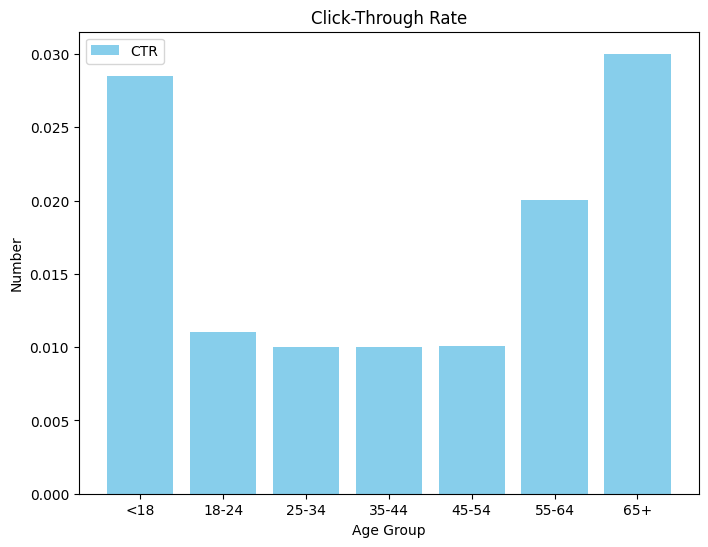

In [14]:
age_group_data = all_data.groupby('age_group',observed=False).agg({'Clicks': 'sum', 'Impressions': 'sum'})
age_group_data['CTR'] = age_group_data['Clicks'] / age_group_data['Impressions']

plt.figure(figsize=(8, 6))
plt.bar(age_group_data.index, age_group_data['CTR'], label='CTR', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Number')
plt.title('Click-Through Rate')
plt.legend()
plt.show()

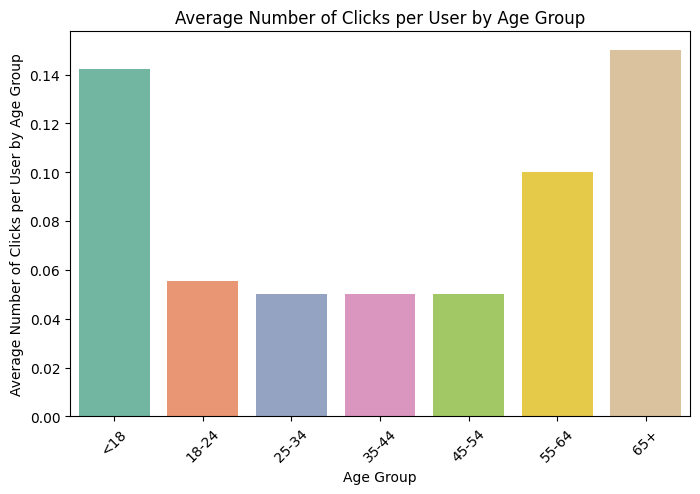

In [28]:
average_clicks_by_age = all_data.groupby('age_group',observed=False)['Clicks'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='age_group', y='Clicks', data=average_clicks_by_age, hue='age_group', palette='Set2', legend=False)
plt.title('Average Number of Clicks per User by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Clicks per User by Age Group')
plt.xticks(rotation=45)
plt.show()


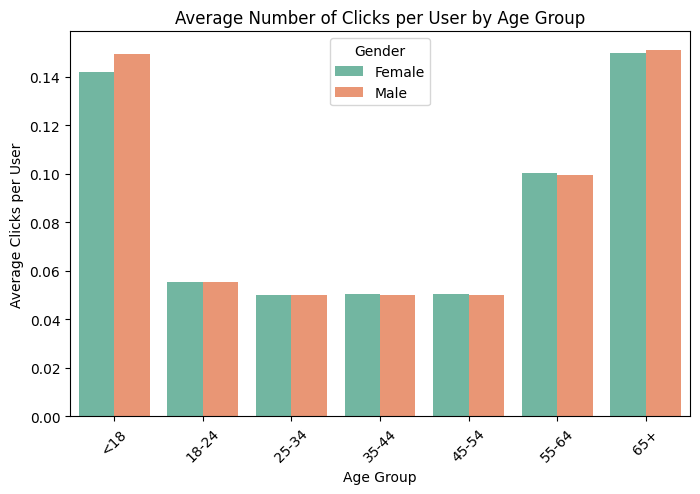

In [27]:
average_impressions_by_age_gender = all_data.groupby(['age_group', 'Gender'],observed=False)['Clicks'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='age_group', y='Clicks', hue='Gender', data=average_impressions_by_age_gender, palette='Set2')
plt.title('Average Number of Clicks per User by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Clicks per User')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


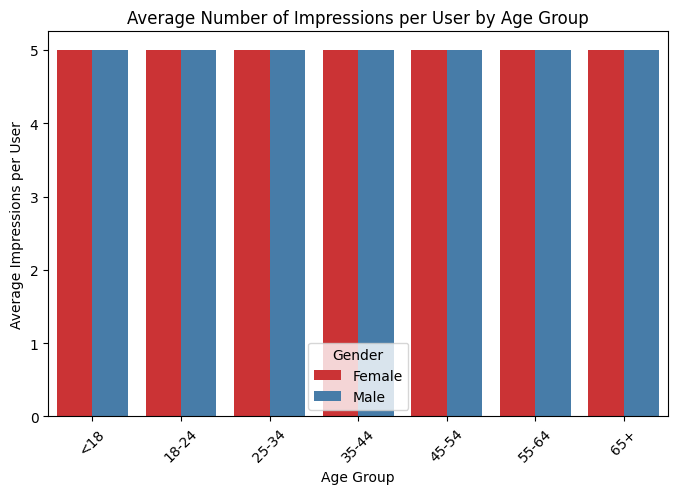

In [26]:
average_impressions_by_age_gender = all_data.groupby(['age_group', 'Gender'],observed=False)['Impressions'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='age_group', y='Impressions', hue='Gender', data=average_impressions_by_age_gender, palette='Set1')
plt.title('Average Number of Impressions per User by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Impressions per User')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

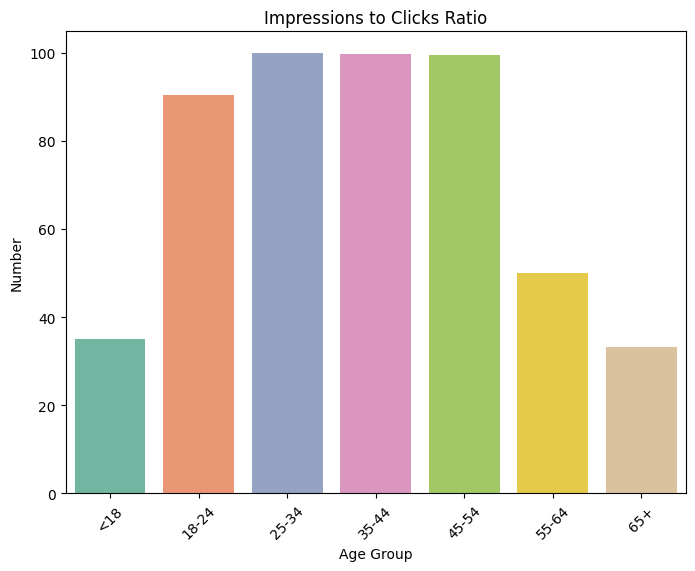

In [18]:
age_group_data['Impressions_to_Clicks_Ratio'] = age_group_data['Impressions'] / age_group_data['Clicks']

plt.figure(figsize=(8, 6))
sns.barplot(x='age_group', y='Impressions_to_Clicks_Ratio', hue='age_group', data=age_group_data, palette='Set2')
plt.title('Impressions to Clicks Ratio')
plt.xlabel('Age Group')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.show()

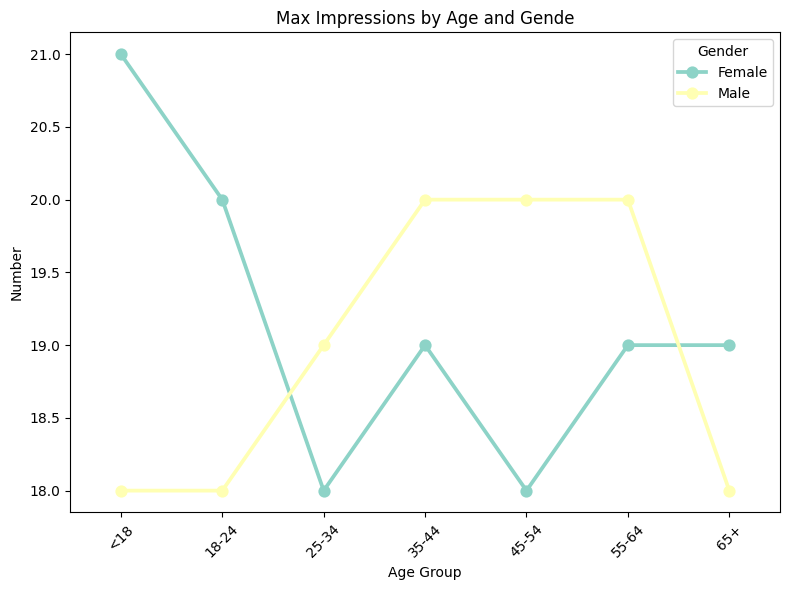

In [19]:
max_impressions = all_data.groupby(['age_group', 'Gender'],observed=False)['Impressions'].max().reset_index(name='max_impressions')

plt.figure(figsize=(8, 6))
sns.pointplot(x='age_group', y='max_impressions', hue='Gender', data=max_impressions, palette='Set3')
plt.title('Max Impressions by Age and Gende')
plt.xlabel('Age Group')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

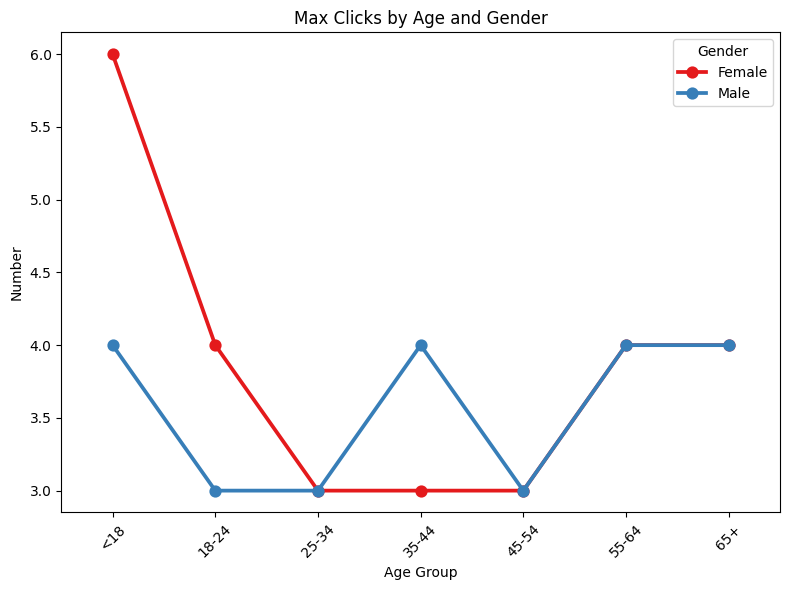

In [20]:
max_clicks = all_data.groupby(['age_group', 'Gender'],observed=False)['Clicks'].max().reset_index(name='max_clicks')

plt.figure(figsize=(8, 6))
sns.pointplot(x='age_group', y='max_clicks', hue='Gender', data=max_clicks, palette='Set1')
plt.title('Max Clicks by Age and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

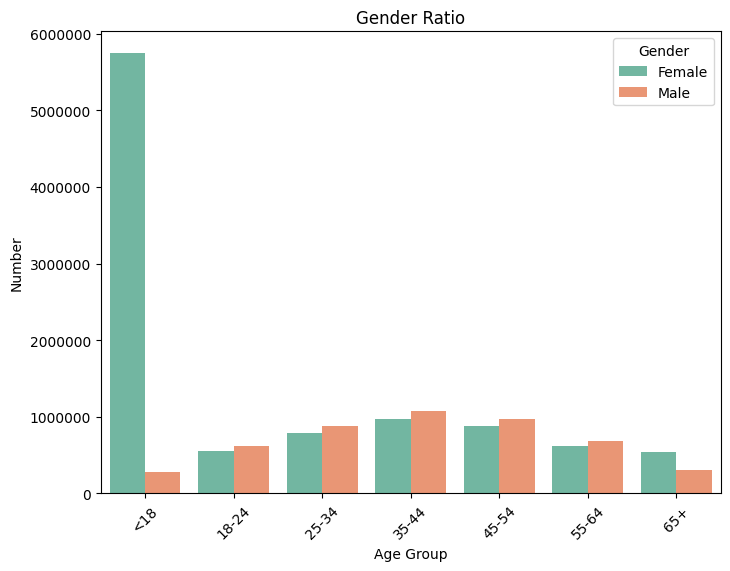

In [29]:
gender_age_counts = all_data.groupby(['age_group', 'Gender'],observed=False).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(x='age_group', y='Count', hue='Gender', data=gender_age_counts, palette='Set2')
plt.title('Gender Ratio')
plt.xlabel('Age Group')
plt.ylabel('Number')
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()

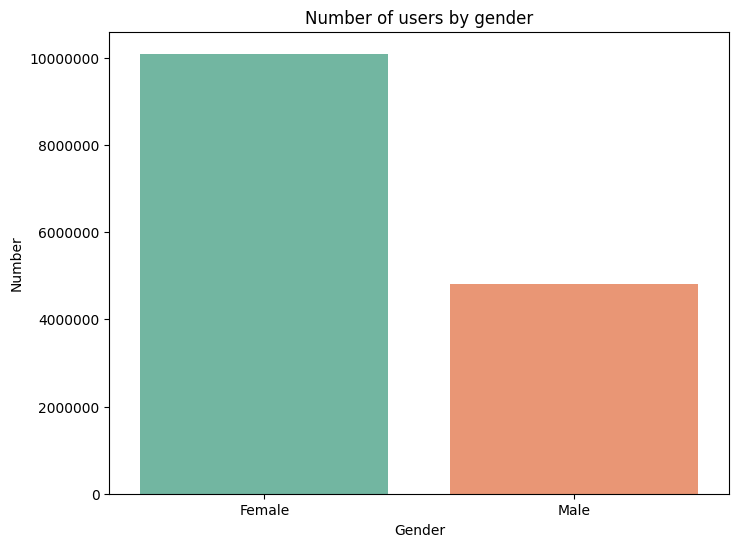

In [22]:
num_gender = all_data.groupby('Gender').size().reset_index(name='Number')

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Number', hue='Gender', data=num_gender, palette='Set2')
plt.title('Number of users by gender')
plt.xlabel('Gender')
plt.ylabel('Number')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()

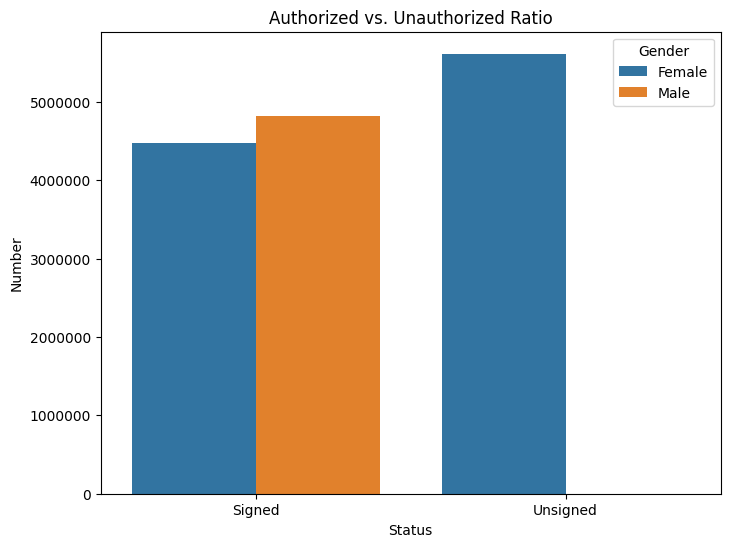

In [23]:
num_signed = all_data.groupby(['Gender','Signed_In'],observed=False).size().reset_index(name='Number')

plt.figure(figsize=(8, 6))
sns.barplot(x='Signed_In', y='Number', hue='Gender', data=num_signed)
plt.title('Authorized vs. Unauthorized Ratio')
plt.xlabel('Status')
plt.ylabel('Number')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.show()

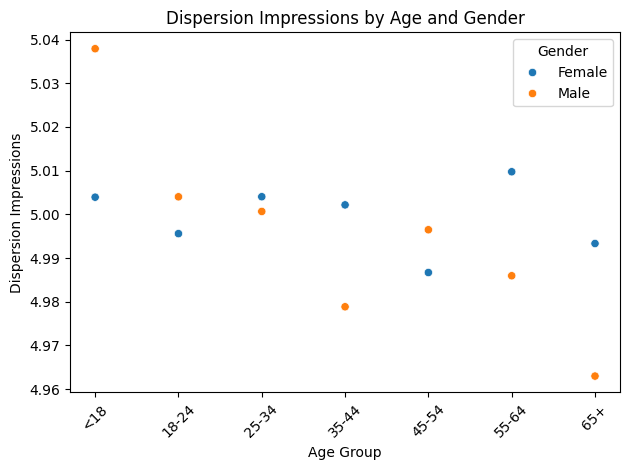

In [24]:
disp_impressions = all_data.groupby(['age_group', 'Gender'],observed=False)['Impressions'].var().reset_index(name='disp_impressions')
sns.scatterplot(x='age_group', y='disp_impressions', hue='Gender', data=disp_impressions)
plt.title('Dispersion Impressions by Age and Gender')
plt.xlabel('Age Group')
plt.ylabel('Dispersion Impressions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

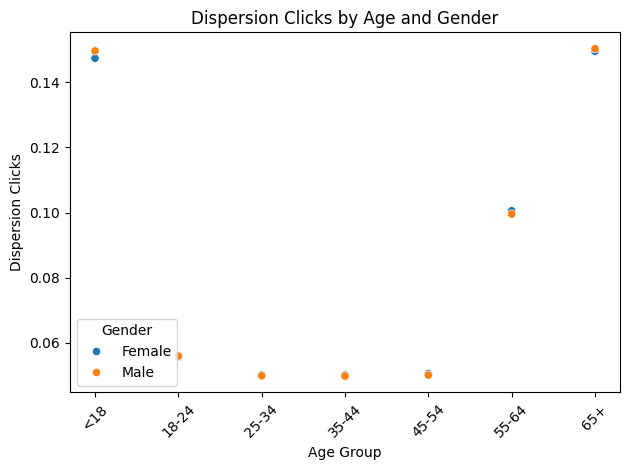

In [25]:
disp_clicks = all_data.groupby(['age_group', 'Gender'],observed=False)['Clicks'].var().reset_index(name='disp_clicks')
sns.scatterplot(x='age_group', y='disp_clicks', hue='Gender', data=disp_clicks)
plt.title('Dispersion Clicks by Age and Gender')
plt.xlabel('Age Group')
plt.ylabel('Dispersion Clicks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()